In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
with open('data/returns.json') as f:
    returns = json.load(f)

In [3]:
models = list(returns.keys())

In [7]:
returns['linear'].keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [10]:
Tvals = sorted( [int(x) for x in list(returns['linear']['0'].keys())])

In [11]:
Tvals

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

Look at average performance over model instantiation and episode

In [21]:
model_returns_avg = { model: {} for model in models }
model_returns_err = { model: {} for model in models }
for model in models:
    r = returns[model]
    for T in Tvals:
        rets = []
        for n in r.keys():
            rets += r[n][str(T)]
        model_returns_avg[model][T] = np.mean(rets)
        model_returns_err[model][T] = np.std(rets) / np.sqrt(len(rets))

Text(0.5,0,'eval. time')

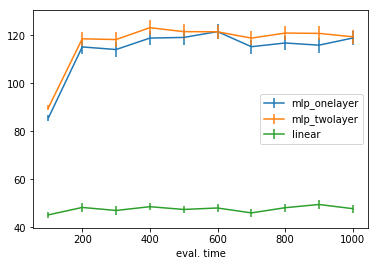

In [22]:
%matplotlib inline
fig, ax = plt.subplots()
for model in models:
    y = [model_returns_avg[model][T] for T in Tvals]
    yerr = [model_returns_err[model][T] for T in Tvals]
    ax.errorbar(Tvals, y, yerr=yerr, label=model)

ax.legend()
ax.set_xlabel("eval. time")